In [1]:
from curvatureStrategy import *
from utils import *

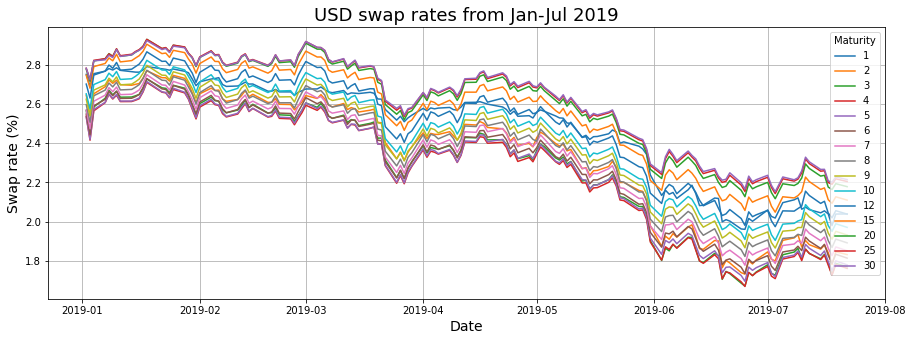

In [2]:
start_date = '2019-01-01'
end_date = '2019-07-30'
currency = 'USD'
w = 50

df = getData(start_date, end_date, currency)
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Swap rate (%)')
plt.title('USD swap rates from Jan-Jul 2019')
plt.legend(list(df.columns.get_level_values(1)), title='Maturity')
plt.grid()
plt.show()

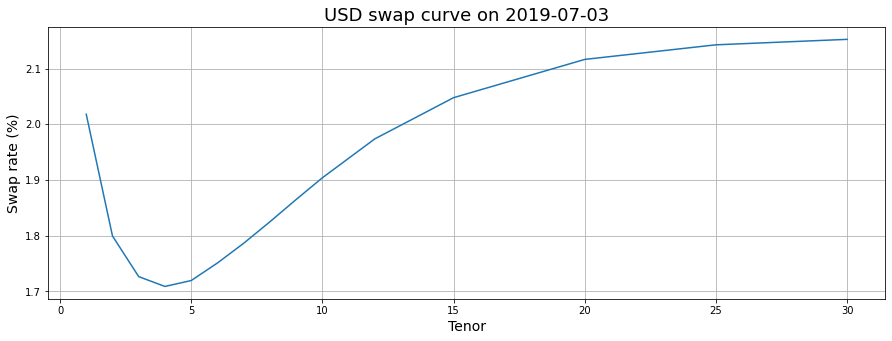

In [3]:
df.loc['2019-07-03','USD'].plot()
plt.xlabel('Tenor')
plt.ylabel('Swap rate (%)')
plt.title('USD swap curve on 2019-07-03')
plt.grid()
plt.show()

# USD Jan-Jul 2019 swaps
# w = 50, curvatureThreshold=0.002, normal coordinate descent, cd_iter = 1

In [ ]:
strategy = CurvatureStrat(df, cd_iter=1, cd_weight=None)

yield_pred_evol, L_evol, m_evol, _ = strategy.getLaplacian(w)
# output cleared

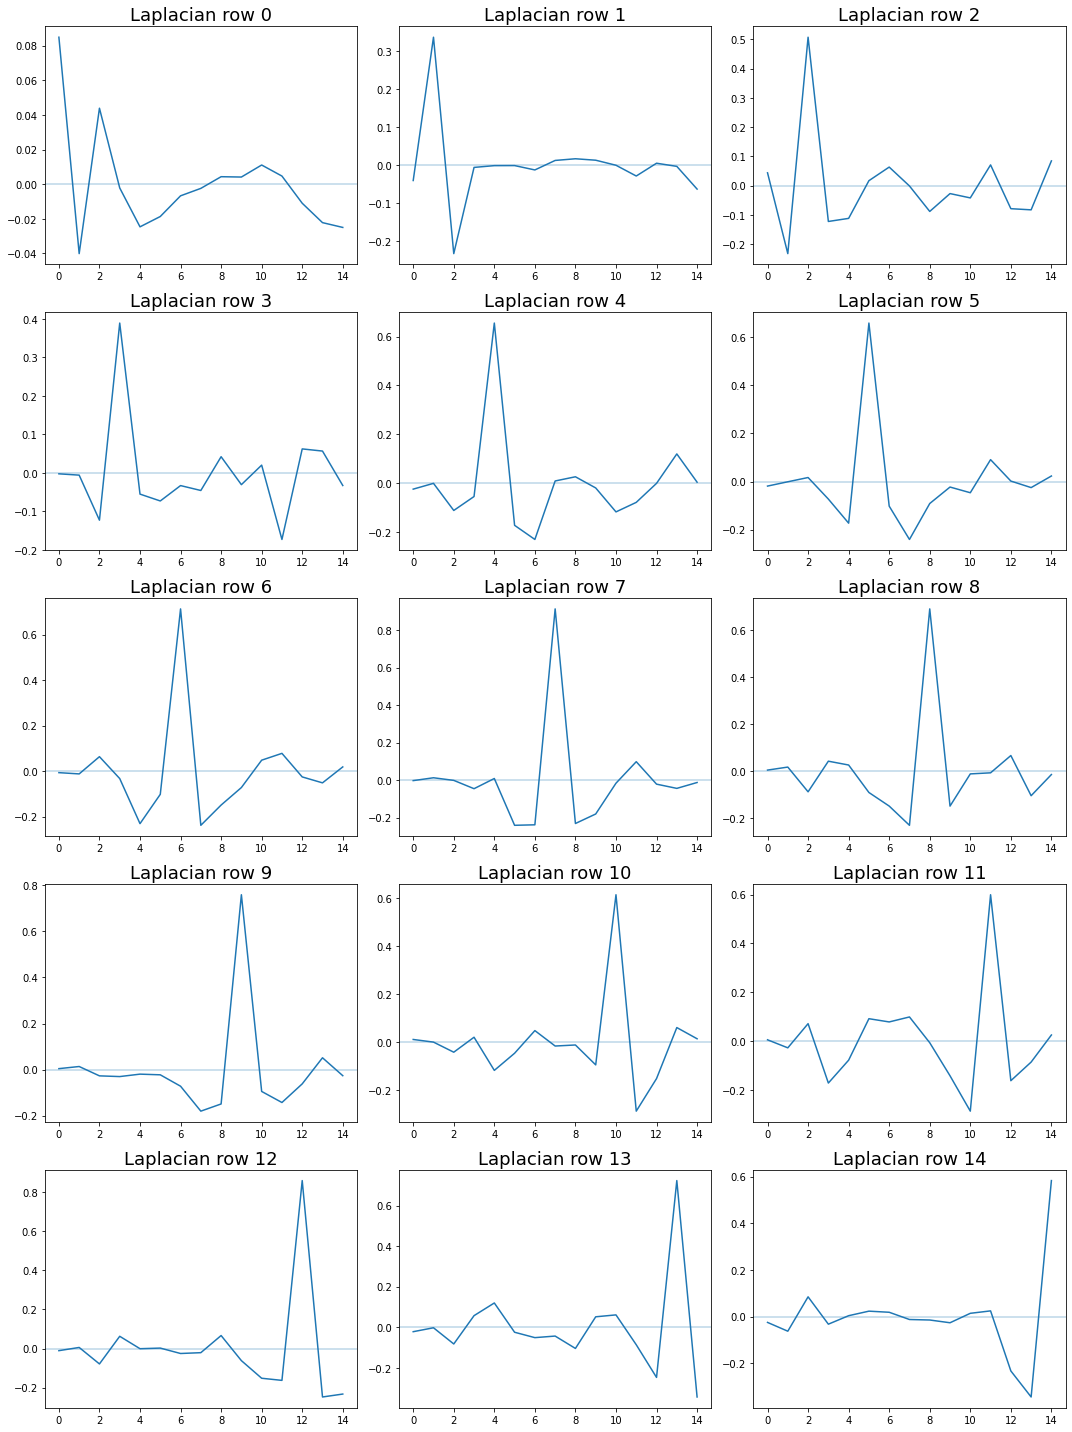

In [5]:
strategy.plotLaplacian(L_evol, whichStride=15)

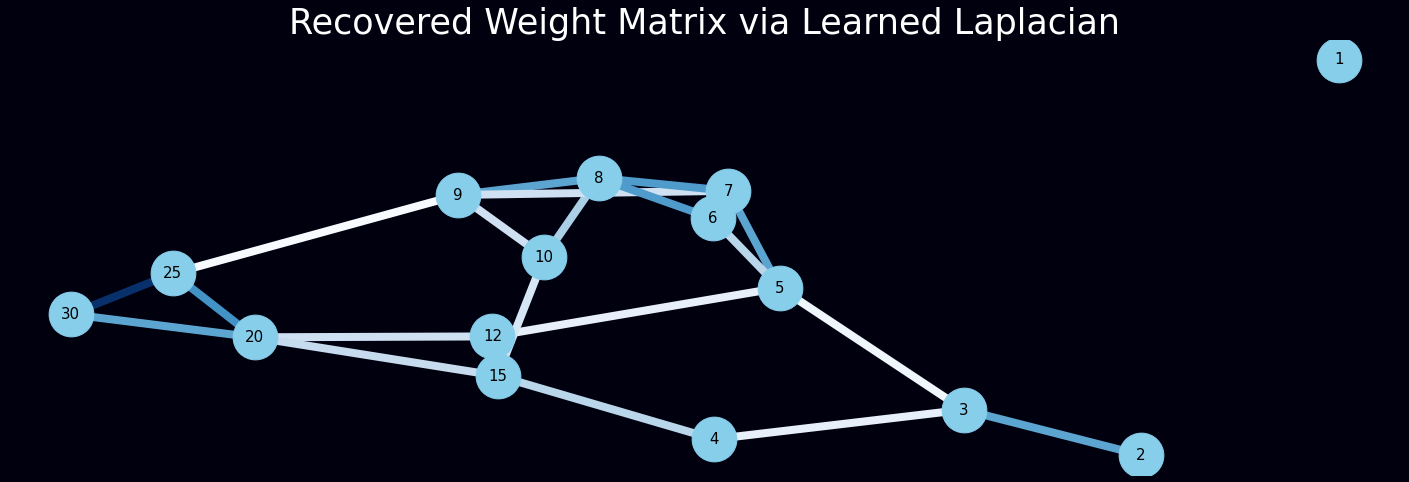

In [6]:
strategy.get_learnedWeightMatrix(L_evol, whichStride=15, showGraph=True)

In [7]:
profits, _, _, _ = strategy.backtest(w, m_evol, L_evol)

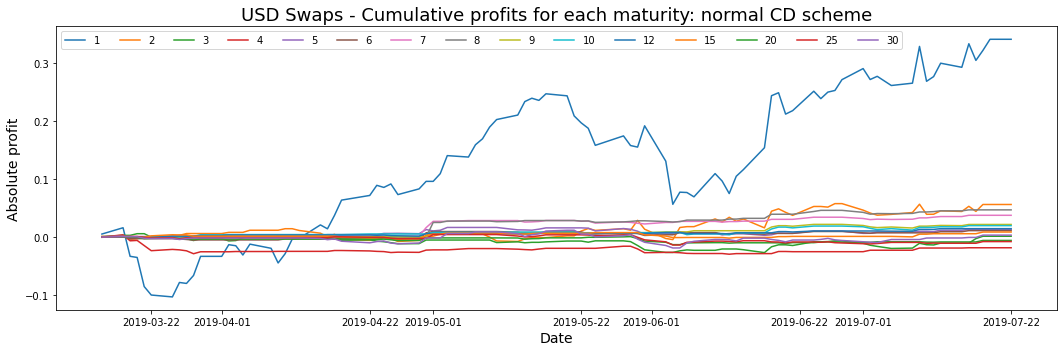

In [8]:
strategy.cumulativeProfitsByMaturity(profits)

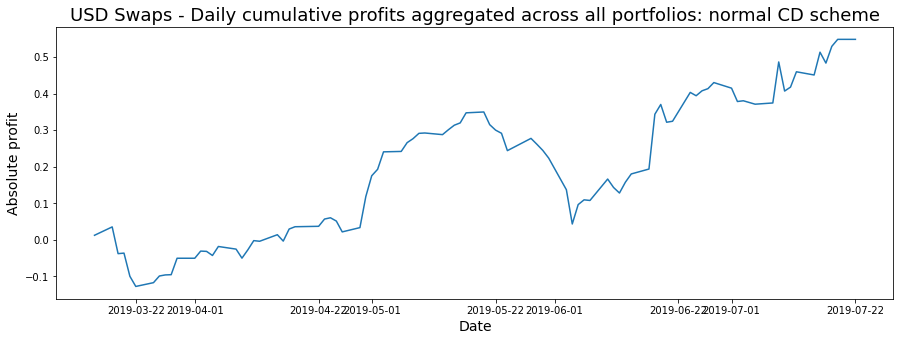

In [9]:
strategy.cumulativeProfitsAggregated(profits)

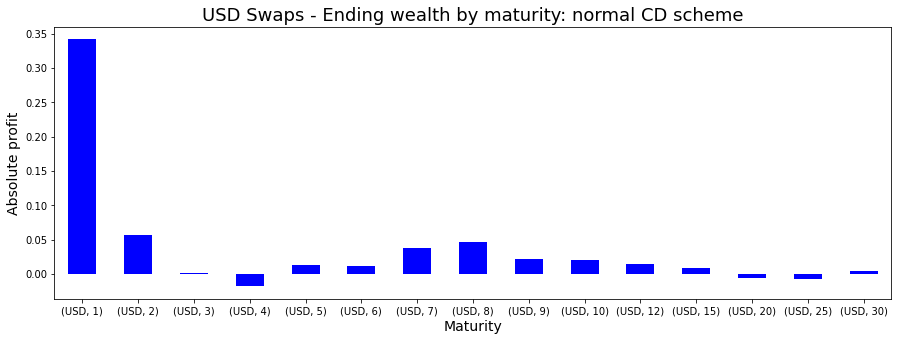

In [10]:
strategy.endingWealth(profits)

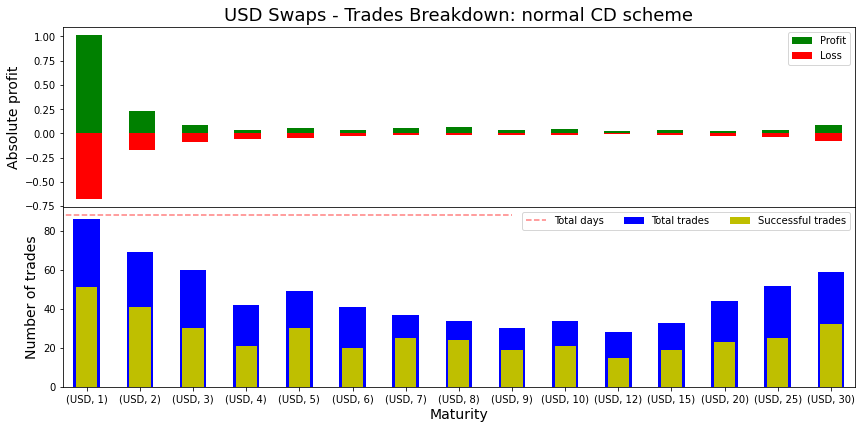

In [11]:
strategy.tradeAnalytics(profits,figsize=(10,5))

In [12]:
strategy.successRatio(profits)

USD                                                      \
                1         2         3         4      5    6         7    
success ratio  0.6  0.602941  0.508475  0.512195  0.625  0.5  0.694444   

                                                                          \
                     8         9         10        12       15        20   
success ratio  0.727273  0.655172  0.636364  0.555556  0.59375  0.534884   

                                   
                     25        30  
success ratio  0.490196  0.551724

In [13]:
#strategy.getHeatmap(title='a')